# Preparation

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [132]:
data = pd.read_csv('data_mahasiswa.csv', sep=';')

# EDA

In [133]:
data.head(10)

,NAMA,TINGGI,BERAT_BADAN
0,M. ADE NOVAL FIRMANSYAH,176,78
1,IKHLASUL AMAL AWALUDIN,165,55
2,ARIFFULAH,170,53
3,AIDA NUR SYA'BANI,167,54
4,ARIEF RACHMAN,169,60
5,ADI SANGJAYA,168,71
6,IMMELDA JASMINE,157,45
7,NURLAELA,150,40
8,MUSNADIL FIRDAUS,165,45
9,INSAN MAULANA,163,48


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAMA         32 non-null     object
 1   TINGGI       32 non-null     int64 
 2   BERAT_BADAN  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 900.0+ bytes


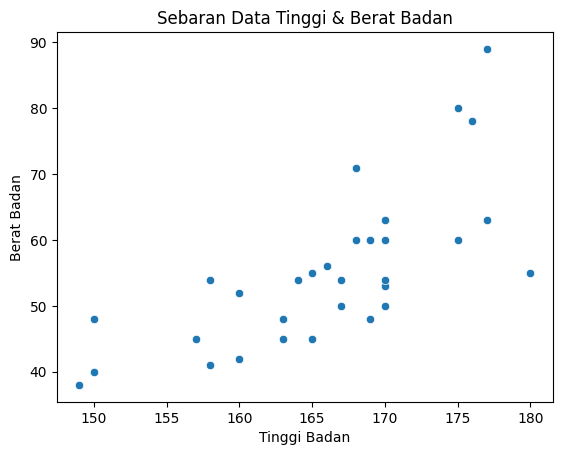

In [135]:
sns.scatterplot(x=data['TINGGI'], y=data['BERAT_BADAN'])
plt.title('Sebaran Data Tinggi & Berat Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Berat Badan')
plt.show()

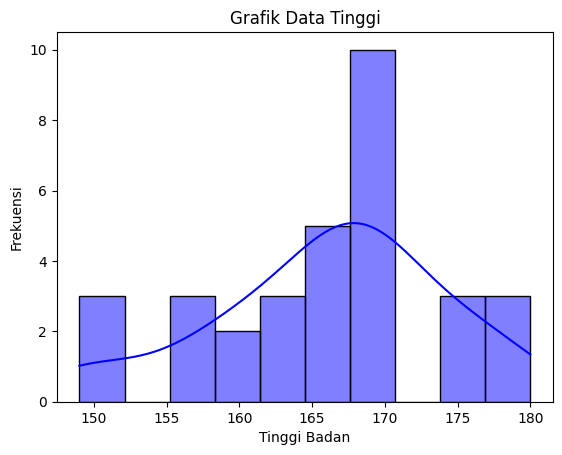

In [136]:
sns.histplot(data['TINGGI'], bins=10, kde=True, color='blue')
plt.title('Grafik Data Tinggi')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show()

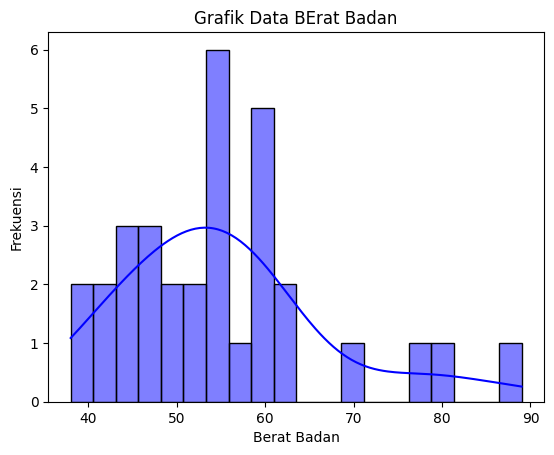

In [137]:
sns.histplot(data['BERAT_BADAN'], bins=20, kde=True, color='blue')
plt.title('Grafik Data BErat Badan')
plt.xlabel('Berat Badan')
plt.ylabel('Frekuensi')
plt.show()

# Outlier With Boxplot

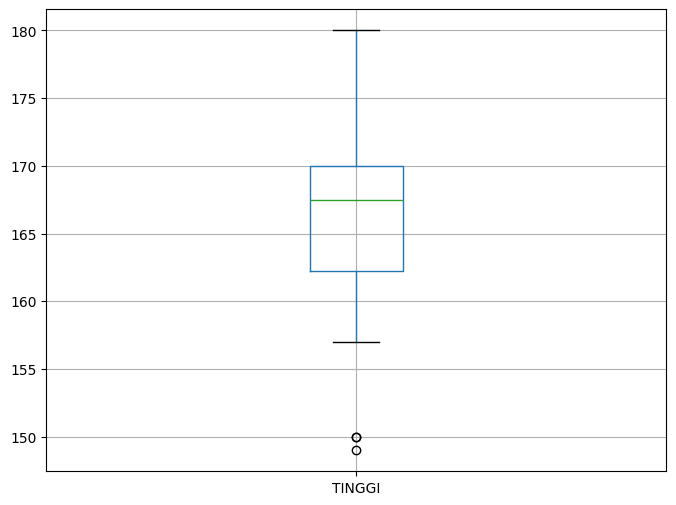

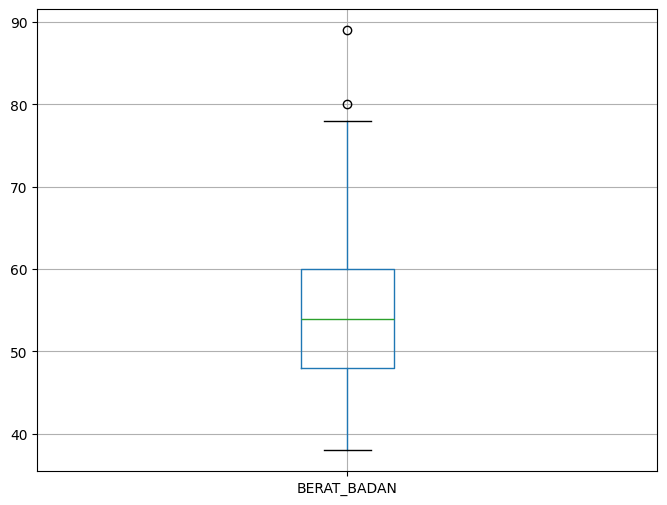

In [138]:
numericColumns = ['TINGGI', 'BERAT_BADAN']

for column in data[numericColumns]:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=[column])

# K-Means Clustering

In [139]:
numericColumns = ['TINGGI', 'BERAT_BADAN']
dataNum = data[numericColumns]

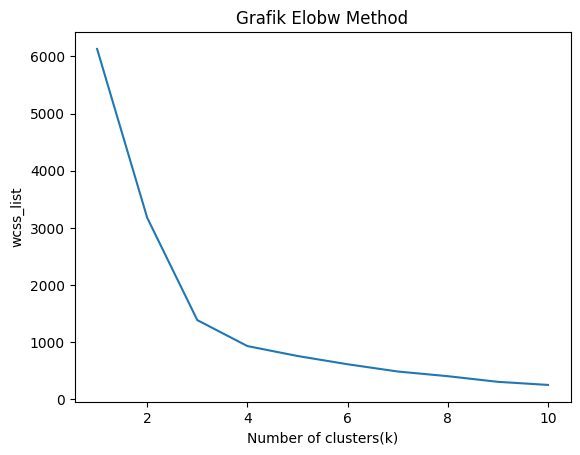

In [140]:
wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataNum)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('Grafik Elobw Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show() 

In [141]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(dataNum)

In [142]:
dataNum['cluster'] = y_means

In [143]:
kmeans.cluster_centers_

array([[174.        ,  79.5       ],
       [164.96428571,  51.89285714]])

In [144]:
dataNum.groupby('cluster').mean()                                       

,TINGGI,BERAT_BADAN
cluster,,
0,174.00,79.50
1,164.96,51.89


In [145]:
agrupador_kmeans = KMeans(n_clusters = 2)
labels_kmeans = agrupador_kmeans.fit_predict(dataNum)
print("Labels K-means: ", labels_kmeans)

Labels K-means:  [0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1]


In [146]:
dataNum["cluster"] = labels_kmeans
dataNum.groupby("cluster").describe()

TINGGI                                                BERAT_BADAN  \
         count   mean  std    min    25%    50%    75%    max       count   
cluster                                                                     
0        12.00 172.83 4.24 168.00 169.00 172.50 176.25 180.00       12.00   
1        20.00 162.05 6.70 149.00 158.00 163.50 167.00 170.00       20.00   

                                                   
         mean   std   min   25%   50%   75%   max  
cluster                                            
0       66.58 10.48 55.00 60.00 61.50 72.75 89.00  
1       48.60  5.50 38.00 45.00 49.00 54.00 56.00

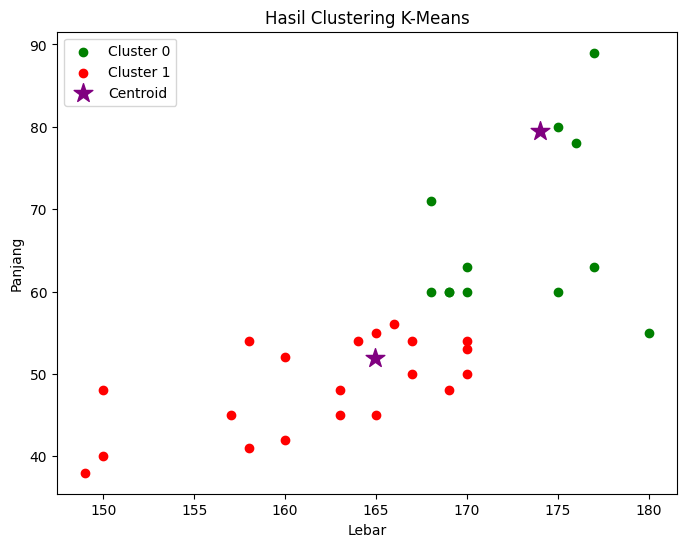

In [147]:
# Membuat plot hasil clustering
plt.figure(figsize=(8,6))
plt.title('Hasil Clustering K-Means')
plt.xlabel('Lebar')
plt.ylabel('Panjang')

data1 = dataNum[dataNum.cluster == 0]
data2 = dataNum[dataNum.cluster == 1]

plt.scatter(data1['TINGGI'], data1['BERAT_BADAN'], color='green', label='Cluster 0')
plt.scatter(data2['TINGGI'], data2['BERAT_BADAN'], color='red', label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='purple', marker='*', s=200, label='Centroid')

plt.legend()

plt.show()